# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Hajar Banyalmarjeh

### Github Repo: https://github.com/Hajarbany/Module6

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

### Question 1

1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [148]:
# Create and activate a Python virtual environment. 
# Before starting the project, try all these imports FIRST
# Address any errors you get running this code cell 
# by installing the necessary packages into your active Python environment.
# Try to resolve issues using your materials and the web.
# If that doesn't work, ask for help in the discussion forums.
# You can't complete the exercises until you import these - start early! 
# We also import pickle and Counter (included in the Python Standard Library).

from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

!pip list

print('All prereqs installed.')

url = "https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/"

response = requests.get(url)

if response.status_code == 200:
    how_laser_headlights_work_html = response.text
    soup = BeautifulSoup(html_content, "html.parser")
    article = soup.find("article")

    if article:
         with open("how_laser_headlights_work_html.pkl", "wb") as file:
            pickle.dump(str(article), file)
            print("how_laser_headlights_work article html was successfully saved to file")


Package                       Version
----------------------------- -------------------
anyio                         3.5.0
appnope                       0.1.2
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
astroid                       2.9.3
attrs                         21.4.0
Babel                         2.9.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
beautifulsoup4                4.12.2
bleach                        4.1.0
blis                          0.7.9
brotlipy                      0.7.0
catalogue                     2.0.8
certifi                       2020.6.20
cffi                          1.14.6
chardet                       4.0.0
click                         8.1.3
conda                         4.11.0
conda-package-handling        1.7.3
confection                    0.1.0
cryptography                  3.4.7
cycler                        0.11.0
cymem                         2.0.7
decorator                     5.1.1
d

### Question 2 

2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [149]:
parser = 'html.parser'
soup = BeautifulSoup(how_laser_headlights_work_html, parser)

def extract_text_from_html(html_content):
    return soup.get_text()

if __name__ == "__main__":
    input_filename = "how_laser_headlights_work_html.pkl"
    with open(input_filename, "rb") as f:
        how_laser_headlights_work_html = pickle.load(f)

    article_element = soup.find('article')
    print(article_element.get_text())



How Laser Headlights Work


                130 Comments            

by:
Lewin Day



March 22, 2021








When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!

Laser Headlights?!
BWM’s prototype laser headlight assemblies undergoing testing.
The first image brought to mind by the phrase “laser headlights” is that of laser beams firing out the front of an automobile. Obviously, coherent beams of monochromatic light would make for poor illumination outside o

### Question 3

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [151]:

import pickle
import spacy
from collections import Counter
import string


with open("how_laser_headlights_work_html.pkl", "rb") as file:
   how_laser_headlights_work_html = pickle.load(file)

soup = BeautifulSoup(how_laser_headlights_work_html, "html.parser")

article_text = soup.get_text()

nlp = spacy.load("en_core_web_sm")

doc = nlp(article_text)

clean_tokens = remove_stopwords_and_punctuations(doc)

Five_most_common_tokens = Counter(clean_tokens).most_common(5)

print("Five most common tokens:")
for token, frequency in most_common_tokens:
     print(f"{token}: {frequency} occurrences")
        


Five most common tokens:
laser: 35 occurrences
headlight: 22 occurrences
beam: 12 occurrences
technology: 10 occurrences
led: 6 occurrences


### Question 4

4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [152]:
def remove_stopwords_and_punctuations(tokens):
    return [token.lemma_.lower() for token in tokens if not token.is_stop and token.is_alpha]


with open("how_laser_headlights_work_html.pkl", "rb") as file:
    how_laser_headlights_work_html = pickle.load(file)

soup = BeautifulSoup(how_laser_headlights_work_html, "html.parser")

article_text = soup.get_text()

nlp = spacy.load("en_core_web_sm")

doc = nlp(article_text)

clean_lemmas = remove_stopwords_and_punctuations(doc)

Five_most_common_lemmas = Counter(clean_lemmas).most_common(5)

print("Five most common lemmas:")
for lemma, frequency in most_common_lemmas:
        print(f"'{lemma}': {frequency}")



Five most common lemmas:
'laser': 40
'headlight': 28
'beam': 12
'technology': 10
'light': 10


### Question 5

5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [153]:
def score_sentence_by_token(sentence, interesting_tokens):
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(sentence)

    clean_tokens = remove_stopwords_and_punctuations(doc)

    interesting_token_count = sum(1 for token in clean_tokens if token in interesting_tokens)

    score = interesting_token_count / len(clean_tokens)
    return score

def score_sentence_by_lemma(sentence, interesting_lemmas):
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(sentence)

    clean_lemmas = remove_stopwords_and_punctuations(doc)

    interesting_lemma_count = sum(1 for lemma in clean_lemmas if lemma in interesting_lemmas)

    score = interesting_lemma_count / len(clean_lemmas)
    return score


with open("how_laser_headlights_work_html.pkl", "rb") as file:
    how_laser_headlights_work_html = pickle.load(file)

soup = BeautifulSoup(how_laser_headlights_work_html, "html.parser")

article_text = soup.get_text()

frequent_tokens = ['laser', 'headlight', 'work']
frequent_lemmas = ['laser', 'headlight', 'work']

score_sentence_by_token = score_sentence_by_token(article_text, frequent_tokens)
score_sentence_by_lemma = score_sentence_by_lemma(article_text, frequent_lemmas)

print(f"score_sentence_by_token: {score_sentence_by_token}")
print(f"score_sentence_by_lemma: {score_sentence_by_lemma}")



score_sentence_by_token: 0.11952861952861953
score_sentence_by_lemma: 0.11952861952861953


### Question 6

6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

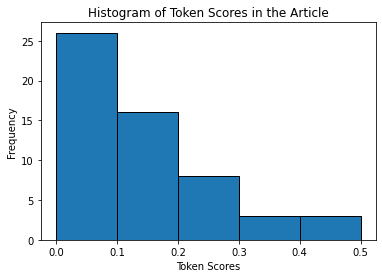

In [160]:
with open("how_laser_headlights_work_html.pkl", "rb") as file:
    how_laser_headlights_work_html = pickle.load(file)

soup = BeautifulSoup(how_laser_headlights_work_html, "html.parser")

article_text = soup.get_text()

nlp = spacy.load("en_core_web_sm")
sentences = list(nlp(article_text).sents)

frequent_tokens = ['laser', 'headlight', 'work']

token_scores = []
for sentence in sentences:
    token_score = score_sentence_by_token(sentence.text, frequent_tokens)
    token_scores.append(token_score)

plt.hist(token_scores, bins=5, edgecolor='black')
plt.xlabel('Token Scores')
plt.ylabel('Frequency')
plt.title('Histogram of Token Scores in the Article')
plt.show()


### Question 7

7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

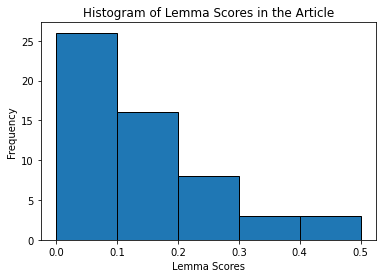

In [161]:
with open("how_laser_headlights_work_html.pkl", "rb") as file:
    how_laser_headlights_work_html = pickle.load(file)

soup = BeautifulSoup(how_laser_headlights_work_html, "html.parser")

article_text = soup.get_text()

nlp = spacy.load("en_core_web_sm")
sentences = list(nlp(article_text).sents)

frequent_lemmas = ['laser', 'headlight', 'work']

lemma_scores = []
for sentence in sentences:
    lemma_score = score_sentence_by_lemma(sentence.text, frequent_lemmas)
    lemma_scores.append(lemma_score)

plt.hist(lemma_scores, bins=5, edgecolor='black')
plt.xlabel('Lemma Scores')
plt.ylabel('Frequency')
plt.title('Histogram of Lemma Scores in the Article')
plt.show()


### Question 8

8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).

### Answer
In order for us to change the code in order to only consider nouns, we can add the code sentence "if token.pos_ == 'NOUN'.As far as which tokens and lemmas would be omitted, it would be the word "led" from the list of tokens, and "light" from the list of lemmas.

In [162]:
nlp = spacy.load("en_core_web_sm")

with open("how_laser_headlights_work_html.pkl", "rb") as file:
    how_laser_headlights_work_html = pickle.load(file)

soup = BeautifulSoup(how_laser_headlights_work_html, "html.parser")

article_text = soup.get_text()

doc = nlp(article_text)

frequent_tokens = [token.lemma_.lower() for token in doc if token.pos_ == "NOUN"]

most_common_tokens = Counter(frequent_tokens).most_common(5)
print("Most common nouns:")
for token, frequency in most_common_tokens:
    print(f"Noun: {token}, Frequency: {frequency}")

Most common nouns:
Noun: laser, Frequency: 35
Noun: headlight, Frequency: 22
Noun: beam, Frequency: 12
Noun: technology, Frequency: 10
Noun: led, Frequency: 6
